# ISL Classification using FastAI

In [1]:
from fastai import *
from fastai.vision import *
from tqdm import tqdm_notebook as tqdm

import random
import numpy as np
import keras
from random import shuffle
from keras.utils import np_utils
from shutil import unpack_archive
import matplotlib.pyplot as plt
import tensorflow as tf

%reload_ext autoreload
%autoreload 2
%matplotlib inline


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.3-py3-none-any.whl size=25850 sha256=d2bf46a589a1a468e3b1ffeb824e31c20a5fe76cafcb52b5133db8673a4b8a23
  Stored in directory: /root/.cache/pip/wheels/fc/9c/6d/1826267c72afa51b564c9c6e0f66abc806879338bc593a2270
Successfully built imutils


### Checking the number of folders

In [3]:
import os
path="/kaggle/input/indian-sign-language/ISL/Train/"
labels = os.listdir("/kaggle/input/indian-sign-language/ISL/Train/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")
for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/kaggle/input/indian-sign-language/ISL/Train/"+label))))

No. of labels: 28
-----------------
Nothing, 41 files
W, 16 files
P, 71 files
Z, 20 files
E, 116 files
I, 85 files
U, 70 files
H, 201 files
F, 146 files
X, 64 files
Q, 38 files
M, 522 files
O, 47 files
L, 63 files
Y, 36 files
R, 13 files
C, 220 files
A, 186 files
D, 224 files
S, 38 files
B, 343 files
N, 62 files
G, 327 files
K, 65 files
Wrong, 195 files
J, 50 files
T, 61 files
V, 68 files


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image

# fig, ax = plt.subplots(nrows=2, ncols=10)
# fig.tight_layout()
# cnt = 0
# for row in ax:
#     for col in row:
#         image_name = np.random.choice(os.listdir(path + labels[cnt]))
#         im = Image.open(path+"{}/{}".format(labels[cnt],image_name))
#         col.imshow(im)
#         col.set_title(labels[cnt])
#         col.axis('off')
#         cnt += 1
# plt.show()

## Converting to a data bunch

In [5]:
size = 224
bs = 64
path="/kaggle/input/indian-sign-language/ISL/Train/"
data = ImageDataBunch.from_folder(path, 
                                  ds_tfms=get_transforms(do_flip=True, flip_vert=False),
                                  valid_pct=0.2, 
                                  size=size, 
                                  num_workers=4,
                                  bs=bs)
data
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2711 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Nothing,Nothing,Nothing,Nothing,Nothing
Path: /kaggle/input/indian-sign-language/ISL/Train;

Valid: LabelList (677 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
K,D,C,M,P
Path: /kaggle/input/indian-sign-language/ISL/Train;

Test: None

In [6]:
# import glob
# path="/kaggle/input/indian-sign-language/ISL/Train/"
# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
#                                   ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# data

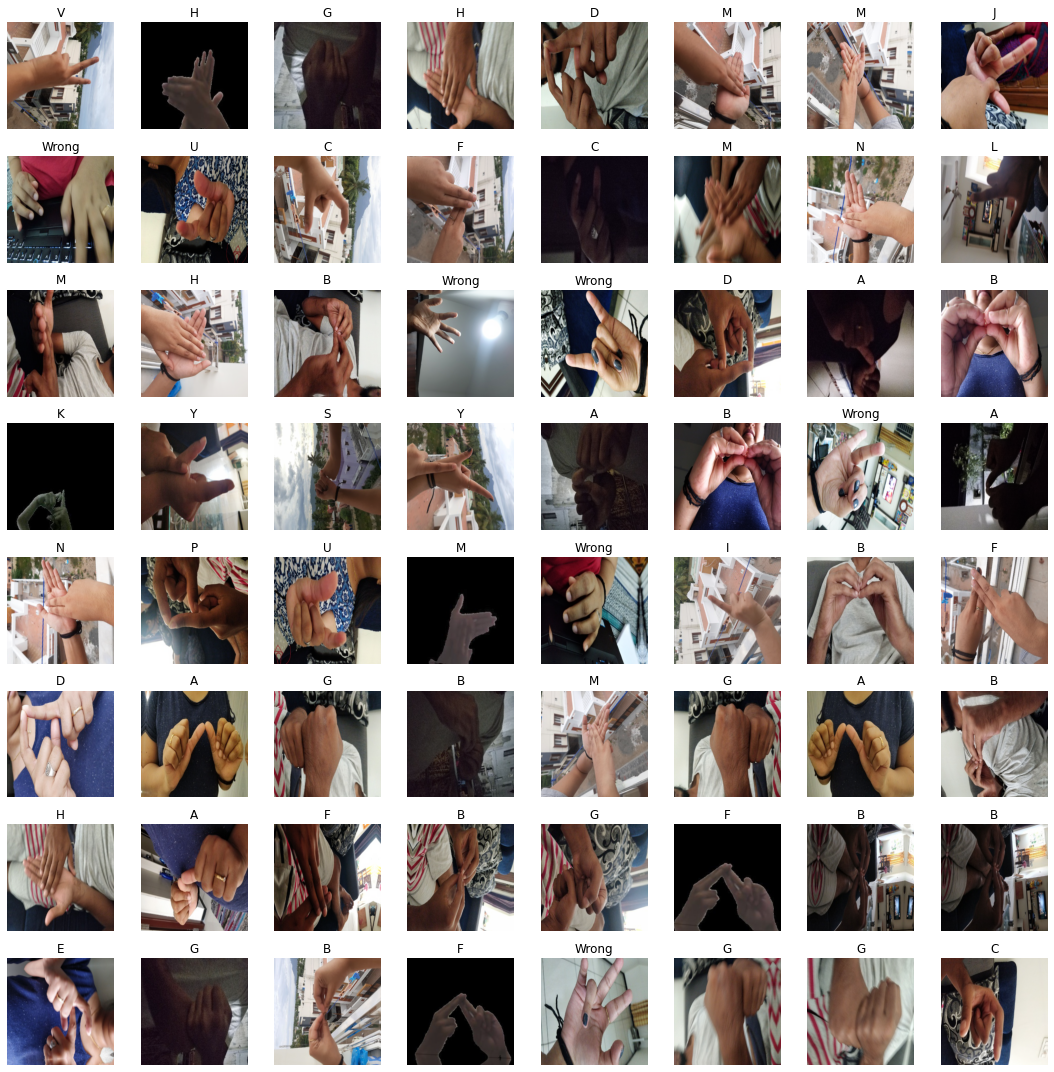

In [7]:
data.show_batch(rows=20, figsize=(15,15))

## Creating a VGG16

In [8]:
from fastai.metrics import error_rate 

thresh=0.2
learn = cnn_learner(data, models.vgg16_bn , metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


In [9]:
learn.model_dir="/kaggle/working/models"

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


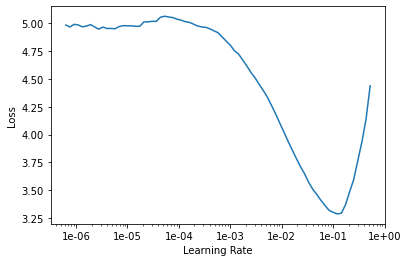

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
#learn.fit_one_cycle(6, max_lr=slice(1e-05, 1e-04))
learn.fit_one_cycle(6,1e-2)
learn.save('Sign-detection-stage-2')

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

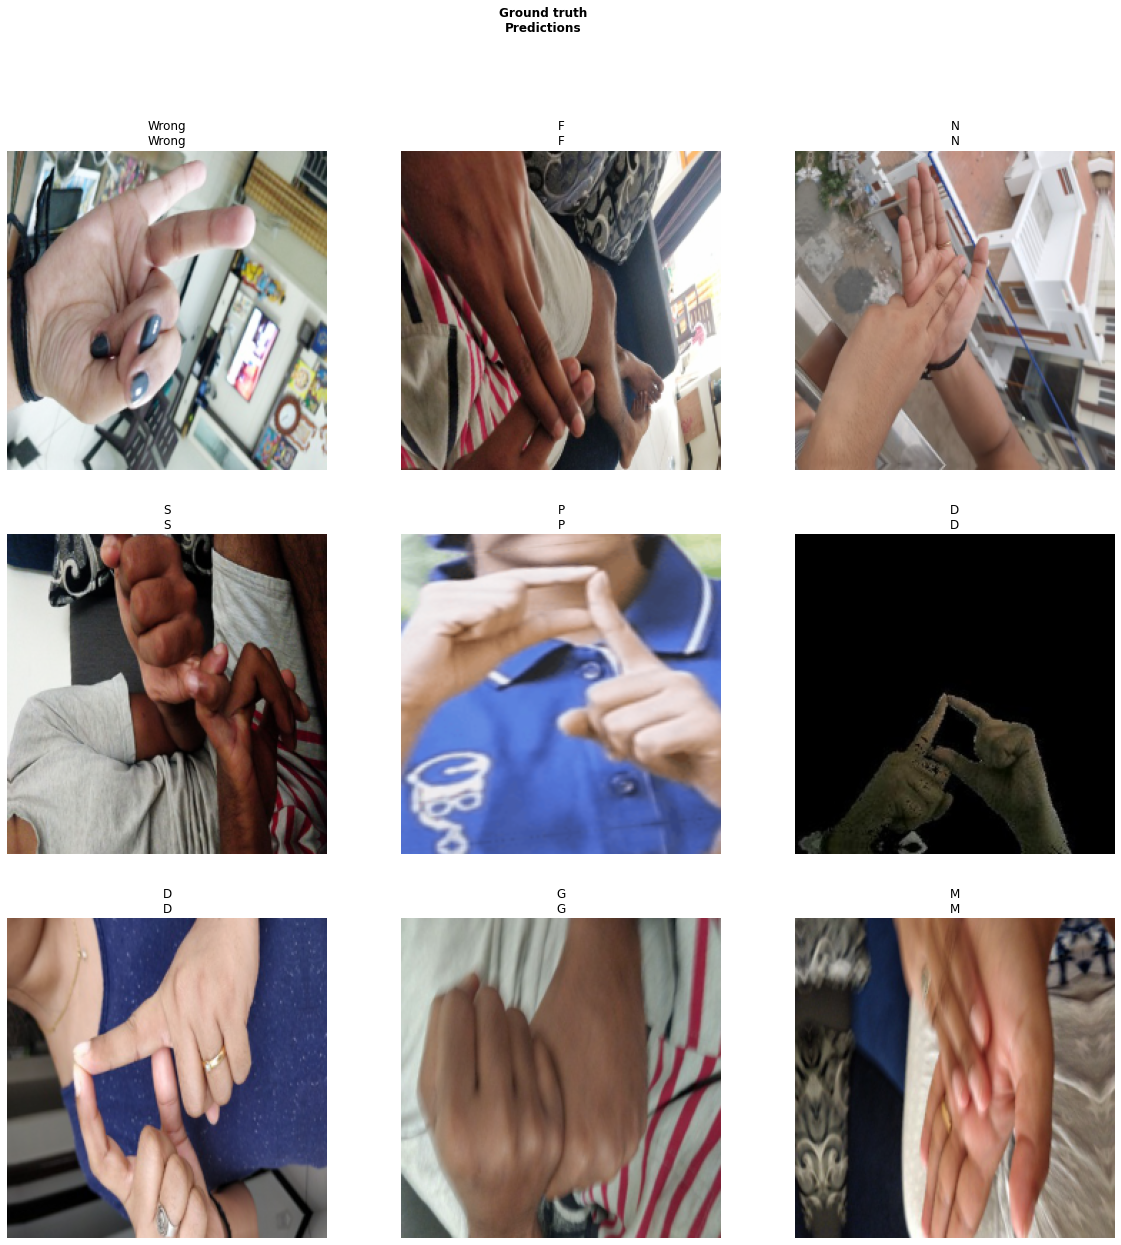

In [12]:
learn.validate()
learn.show_results(ds_type=DatasetType.Train, rows=3, figsize=(20,20))

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

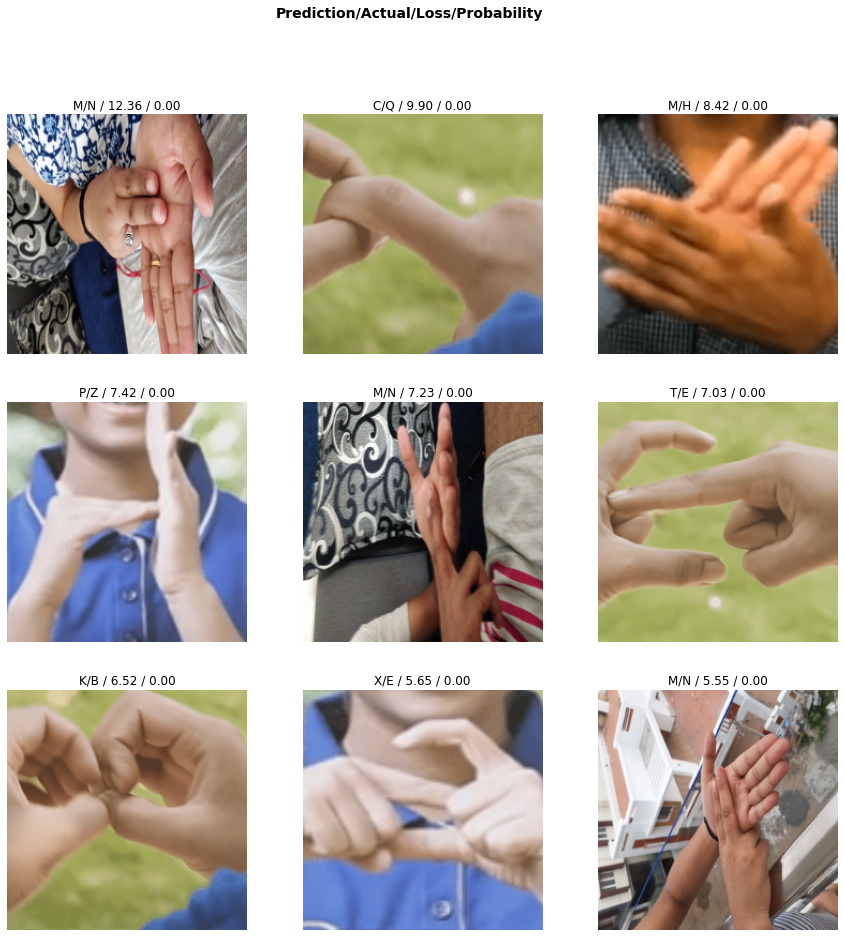

In [14]:
interp.plot_top_losses(9, figsize=(15,15))

# Creating a ResNET CNN

In [15]:
from fastai.vision import *
from fastai.metrics import accuracy
learner = create_cnn(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


## Finding the learning rate

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


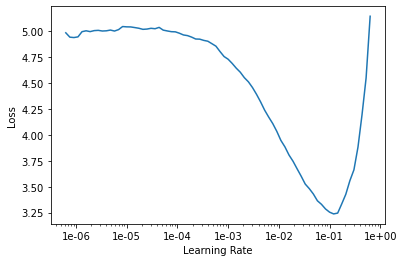

In [16]:
learner.model_dir='/kaggle/working/'
learner.lr_find()
learner.recorder.plot()

## First fit and evaluation

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

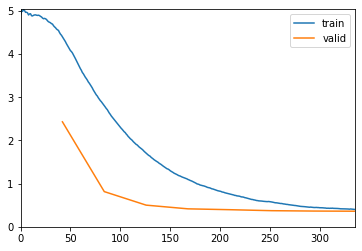

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [17]:
learner.fit_one_cycle(8, max_lr=slice(1e-4, 1e-3))

## Checking the error-prone zone

In [18]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

[('N', 'M', 3),
 ('E', 'D', 2),
 ('J', 'Z', 2),
 ('K', 'T', 2),
 ('L', 'V', 2),
 ('Nothing', 'M', 2),
 ('Wrong', 'G', 2),
 ('Z', 'B', 2)]

Saving the model

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

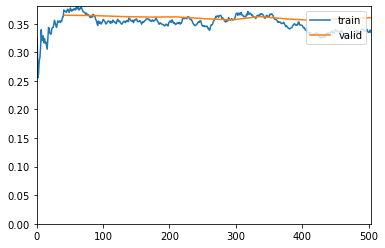

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [19]:
learner.save("stage-1")
#learner.load(‘stage-1’)
learner.unfreeze()
learner.fit_one_cycle(12, max_lr=slice(1e-6, 1e-7))

# Image Cleaning

In [20]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learner)
ImageCleaner(ds, idxs, "/kaggle/working/")

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

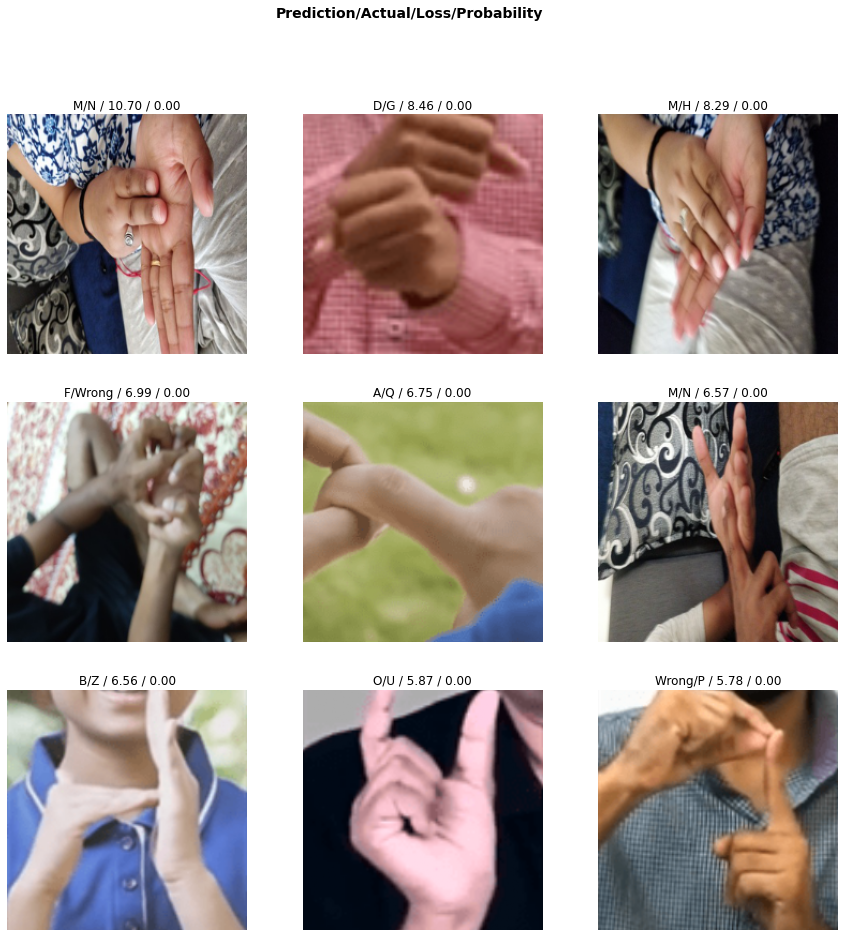

In [21]:
interpreter.plot_top_losses(9, figsize=(15,15))

In [22]:
from fastai.widgets import *
ds, idxs = DatasetFormatter().from_similars(learner, layer_ls=[0,7,1], pool=None)

Getting activations...


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

Computing similarities...


In [23]:
# # ImageCleaner(ds, idxs, '/kaggle/working/')
# most_unsure = DatasetFormatter.from_most_unsure(learner)
# wgt = PredictionsCorrector(*most_unsure)


In [24]:
# wgt.show_corrections(ncols=6, figsize=(9, 7))

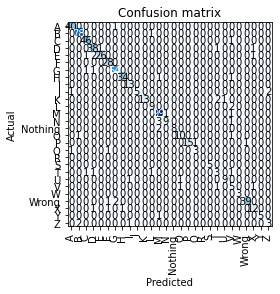

In [25]:
interpreter.plot_confusion_matrix()

In [26]:
# learner.load(‘stage-1’)

In [27]:
# from keras.preprocessing.image import ImageDataGenerator
# train_data_dir="/kaggle/input/indian-sign-language/ISL/Train/"
# img_height=img_width= 224
# batch_size =50

# train_datagen = ImageDataGenerator(rescale=1./255,
#     rotation_range=60,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2) # set validation split

# train_generator = train_datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(img_height, img_height),
#     batch_size=batch_size,
#     class_mode='binary',
#     subset='training') # set as training data

# validation_generator = train_datagen.flow_from_directory(
#     train_data_dir, # same directory as training data
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary',
#     subset='validation') # set as validation data

# model.fit_generator(
#     train_generator,
#     steps_per_epoch = train_generator.samples // batch_size,
#     validation_data = validation_generator, 
#     validation_steps = validation_generator.samples // batch_size,
#     epochs = nb_epochs)